## Problem Statement

The Nashville Housing dataset contains detailed information about real estate transactions in the Nashville area, including attributes such as property addresses, sale dates, sale prices, and property characteristics. However, the dataset is not ready for analysis due to several data quality issues. The primary challenges include missing values, potential outliers, inconsistent data formats, and duplicate entries.

## Objective

The objective is to perform comprehensive data cleaning and preprocessing to ensure the dataset is accurate, consistent, and ready for further analysis. This involves:

1. Identifying and handling missing values appropriately to maintain data integrity.
2. Detecting and addressing outliers in key numerical fields.
3. Standardizing data formats, particularly for date and text fields, to ensure consistency across the dataset.
4. Removing duplicate records to avoid redundancy and ensure unique entries.
5. Conducting feature engineering to enhance the dataset with additional relevant features, such as calculating the age of properties.

In [1]:
# Importing important libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Load and view the dataset
df = pd.read_csv('/users/nik/downloads/Nashville Housing Data for Data Cleaning.csv')
df.head()

,UniqueID,ParcelID,LandUse,PropertyAddress,SaleDate,SalePrice,LegalReference,SoldAsVacant,OwnerName,OwnerAddress,Acreage,TaxDistrict,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath
0,2045,007 00 0 125.00,SINGLE FAMILY,"1808 FOX CHASE DR, GOODLETTSVILLE","April 9, 2013",240000,20130412-0036474,No,"FRAZIER, CYRENTHA LYNETTE","1808 FOX CHASE DR, GOODLETTSVILLE, TN",2.3,GENERAL SERVICES DISTRICT,50000.0,168200.0,235700.0,1986.0,3.0,3.0,0.0
1,16918,007 00 0 130.00,SINGLE FAMILY,"1832 FOX CHASE DR, GOODLETTSVILLE","June 10, 2014",366000,20140619-0053768,No,"BONER, CHARLES & LESLIE","1832 FOX CHASE DR, GOODLETTSVILLE, TN",3.5,GENERAL SERVICES DISTRICT,50000.0,264100.0,319000.0,1998.0,3.0,3.0,2.0
2,54582,007 00 0 138.00,SINGLE FAMILY,"1864 FOX CHASE DR, GOODLETTSVILLE","September 26, 2016",435000,20160927-0101718,No,"WILSON, JAMES E. & JOANNE","1864 FOX CHASE DR, GOODLETTSVILLE, TN",2.9,GENERAL SERVICES DISTRICT,50000.0,216200.0,298000.0,1987.0,4.0,3.0,0.0
3,43070,007 00 0 143.00,SINGLE FAMILY,"1853 FOX CHASE DR, GOODLETTSVILLE","January 29, 2016",255000,20160129-0008913,No,"BAKER, JAY K. & SUSAN E.","1853 FOX CHASE DR, GOODLETTSVILLE, TN",2.6,GENERAL SERVICES DISTRICT,50000.0,147300.0,197300.0,1985.0,3.0,3.0,0.0
4,22714,007 00 0 149.00,SINGLE FAMILY,"1829 FOX CHASE DR, GOODLETTSVILLE","October 10, 2014",278000,20141015-0095255,No,"POST, CHRISTOPHER M. & SAMANTHA C.","1829 FOX CHASE DR, GOODLETTSVILLE, TN",2.0,GENERAL SERVICES DISTRICT,50000.0,152300.0,202300.0,1984.0,4.0,3.0,0.0


In [3]:
# checking the shape
df.shape

(56477, 19)

In [4]:
# checking the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56477 entries, 0 to 56476
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   UniqueID         56477 non-null  int64  
 1   ParcelID         56477 non-null  object 
 2   LandUse          56477 non-null  object 
 3   PropertyAddress  56448 non-null  object 
 4   SaleDate         56477 non-null  object 
 5   SalePrice        56477 non-null  object 
 6   LegalReference   56477 non-null  object 
 7   SoldAsVacant     56477 non-null  object 
 8   OwnerName        25261 non-null  object 
 9   OwnerAddress     26015 non-null  object 
 10  Acreage          26015 non-null  float64
 11  TaxDistrict      26015 non-null  object 
 12  LandValue        26015 non-null  float64
 13  BuildingValue    26015 non-null  float64
 14  TotalValue       26015 non-null  float64
 15  YearBuilt        24163 non-null  float64
 16  Bedrooms         24157 non-null  float64
 17  FullBath    

In [5]:
# describing the data
df.describe()

,UniqueID,Acreage,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath
count,56477.000000,26015.000000,2.601500e+04,2.601500e+04,2.601500e+04,24163.000000,24157.000000,24275.000000,24144.000000
mean,28334.001133,0.498923,6.906856e+04,1.607847e+05,2.323754e+05,1963.744899,3.089912,1.886014,0.283921
std,16352.590651,1.570454,1.060401e+05,2.067999e+05,2.810643e+05,26.542982,0.852869,0.961515,0.487881
min,0.000000,0.010000,1.000000e+02,0.000000e+00,1.000000e+02,1799.000000,0.000000,0.000000,0.000000
25%,14186.000000,0.180000,2.100000e+04,7.590000e+04,1.028000e+05,1948.000000,3.000000,1.000000,0.000000
50%,28313.000000,0.270000,2.880000e+04,1.114000e+05,1.485000e+05,1960.000000,3.000000,2.000000,0.000000
75%,42513.000000,0.450000,6.000000e+04,1.807000e+05,2.683500e+05,1983.000000,3.000000,2.000000,1.000000
max,56635.000000,160.060000,2.772000e+06,1.297180e+07,1.394040e+07,2017.000000,11.000000,10.000000,3.000000


In [6]:
# Display the count of missing values in each column
print('\nMissing Values as per the columns')
df.isnull().sum()


Missing Values as per the columns


UniqueID               0
ParcelID               0
LandUse                0
PropertyAddress       29
SaleDate               0
SalePrice              0
LegalReference         0
SoldAsVacant           0
OwnerName          31216
OwnerAddress       30462
Acreage            30462
TaxDistrict        30462
LandValue          30462
BuildingValue      30462
TotalValue         30462
YearBuilt          32314
Bedrooms           32320
FullBath           32202
HalfBath           32333
dtype: int64

There are some columns with thousands of missing values, so we will be checking the percentage of the missing values per column to determine if we are going to drop the whole column or not.

In [7]:
print('\nMissing Value percentages')
df.isnull().mean() * 100


Missing Value percentages


UniqueID            0.000000
ParcelID            0.000000
LandUse             0.000000
PropertyAddress     0.051348
SaleDate            0.000000
SalePrice           0.000000
LegalReference      0.000000
SoldAsVacant        0.000000
OwnerName          55.272058
OwnerAddress       53.937001
Acreage            53.937001
TaxDistrict        53.937001
LandValue          53.937001
BuildingValue      53.937001
TotalValue         53.937001
YearBuilt          57.216212
Bedrooms           57.226836
FullBath           57.017901
HalfBath           57.249854
dtype: float64

The percentage of missing values is more than 50 % in most of the columns but we can't just simply get rid of all of them, so we will keep the data which is more useful in our analysis and try to fill the missing values.

We will be using graphs to check how to deal with the missing values here. First going for the numerical values to check their linearity

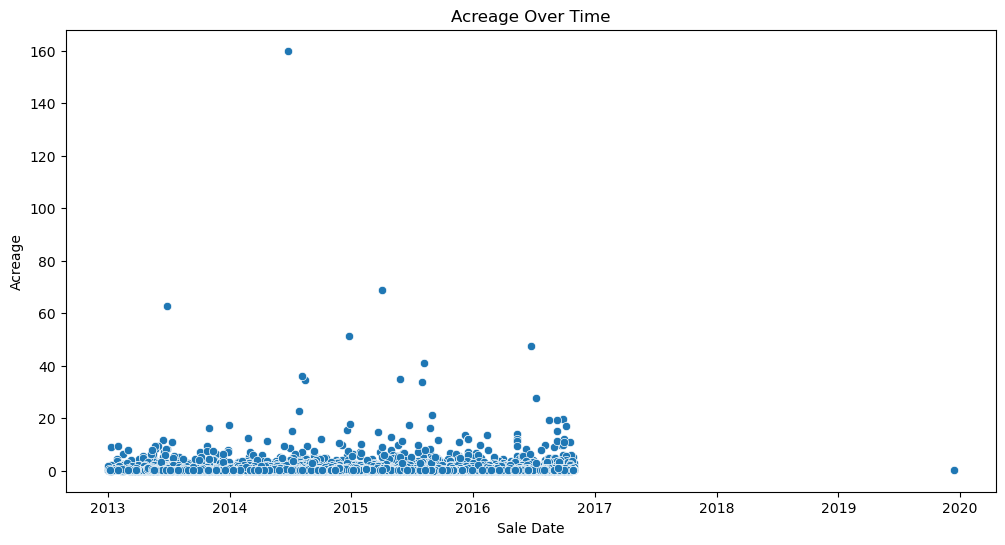

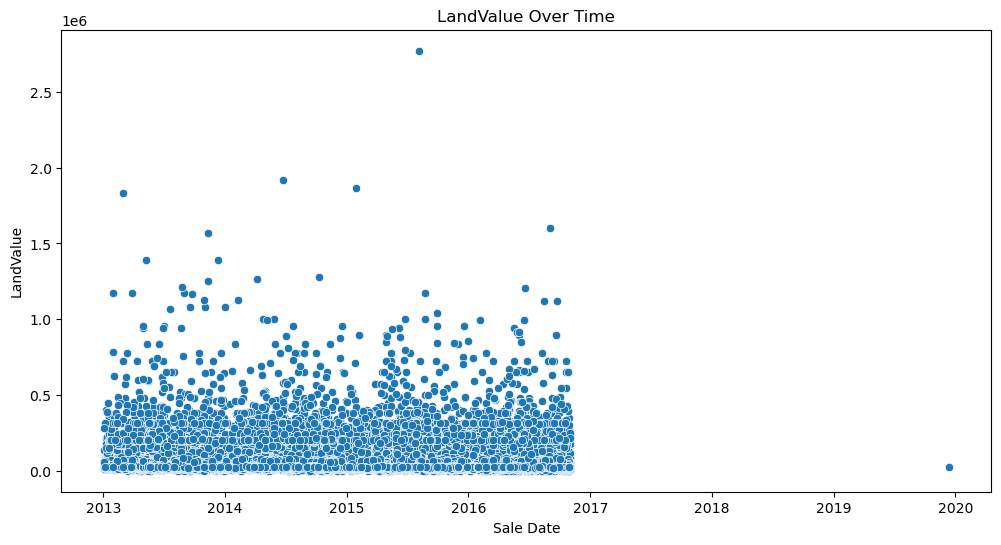

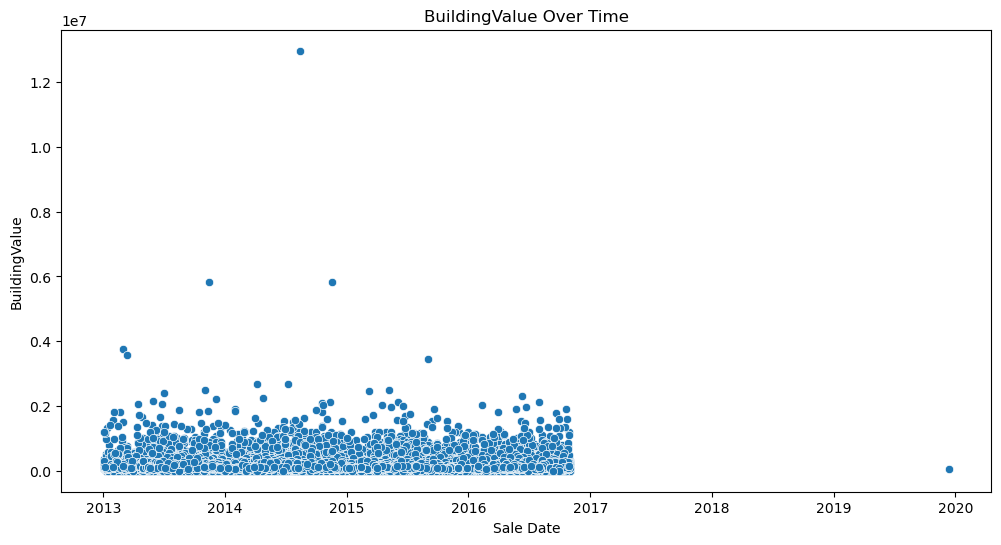

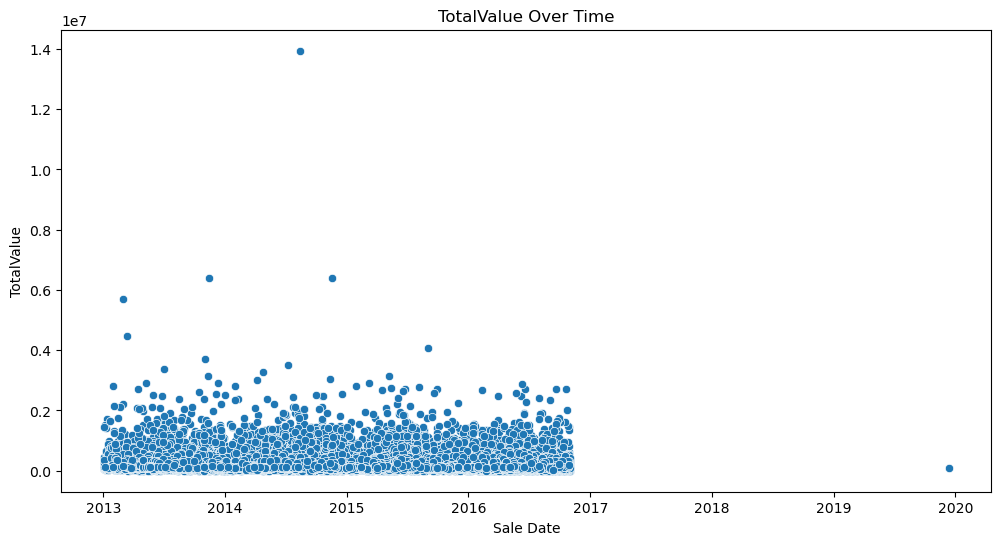

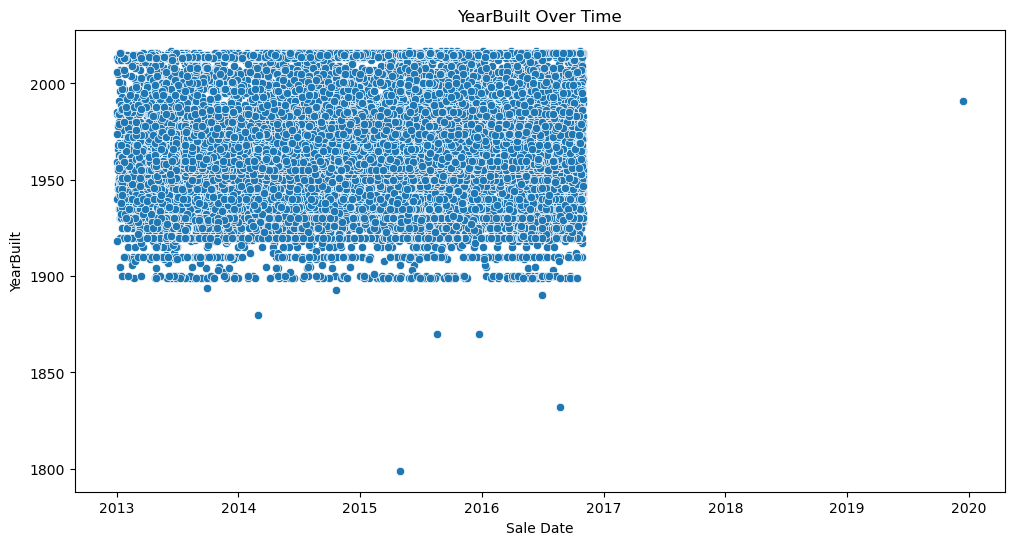

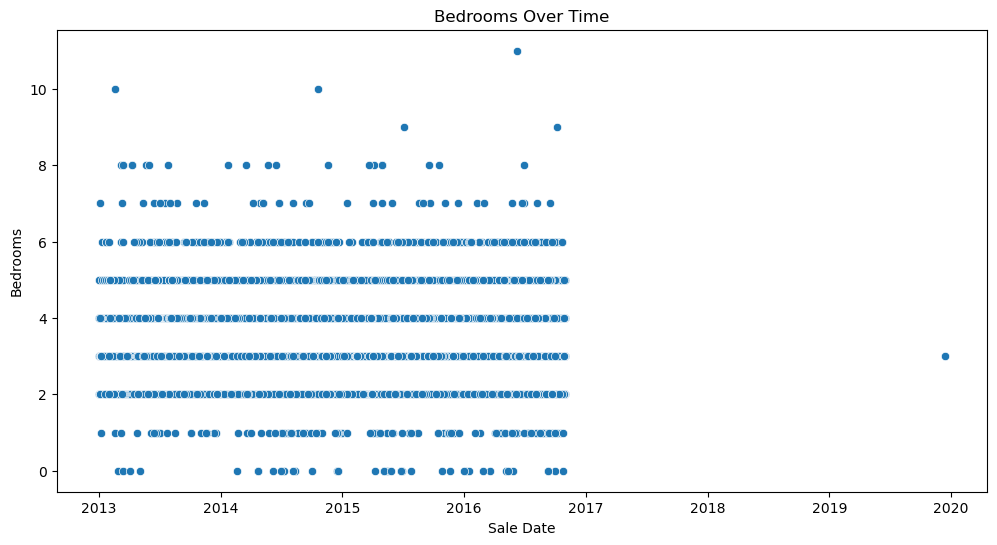

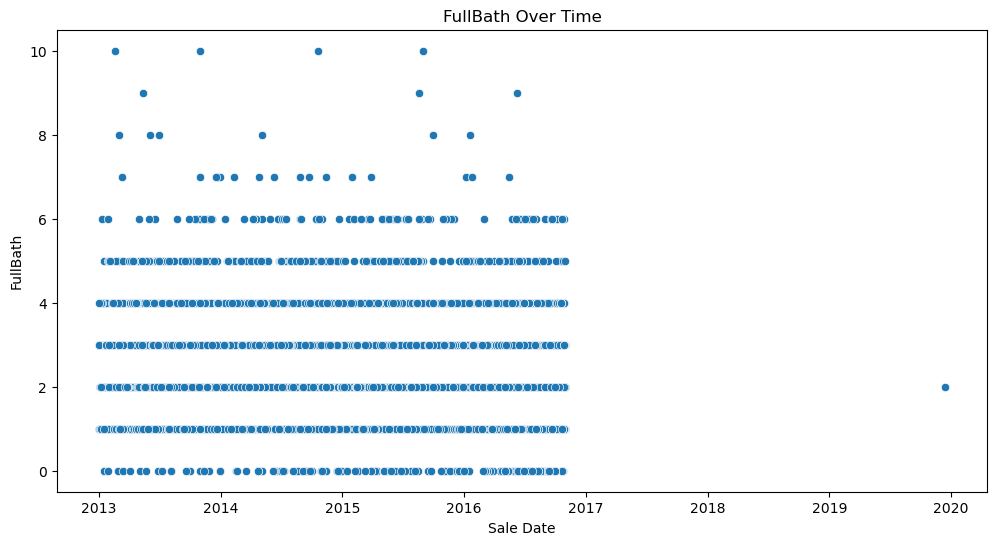

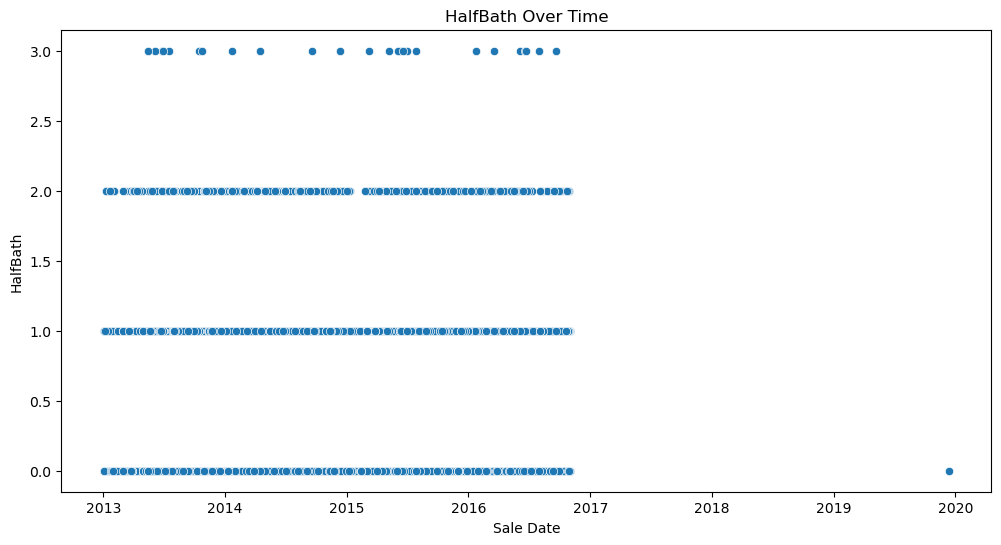

In [8]:
# Convert SaleDate to datetime for plotting
df['SaleDate'] = pd.to_datetime(df['SaleDate'], errors='coerce')

# Define a function to plot each numerical column
def plot_trends(column_name):
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x='SaleDate', y=column_name, data=df)
    plt.title(f'{column_name} Over Time')
    plt.xlabel('Sale Date')
    plt.ylabel(column_name)
    plt.show()

# List of numerical columns with missing values
numerical_columns = ['Acreage', 'LandValue', 'BuildingValue', 'TotalValue', 'YearBuilt', 'Bedrooms', 'FullBath', 'HalfBath']

# Plot each column
for column in numerical_columns:
    plot_trends(column)

As there is not linearity or smooth curve forming in the graph we can choose a sophisticated method KNN which is K- Nearest Neighbour imputation technique to fill the missing values. Median is another choice we could use to avoid many outliers, but it might end up giving the least accurate fills for the missing values, as the who;e data doesnt follow a pattern but is more circumstantial. In this case the circumstance is the grography and time. So we will go with KNN instead of Median for numerical columns.

In [9]:
# Importing KNN Imputer
from sklearn.impute import KNNImputer

# Initialize the KNNImputer
imputer = KNNImputer(n_neighbors=25)

# Apply KNN imputation to the numerical columns
df[numerical_columns] = imputer.fit_transform(df[numerical_columns])

In [10]:
# Lets check for the missig value again...
print('\nMissing Value percentages')
df.isnull().mean() * 100


Missing Value percentages


UniqueID            0.000000
ParcelID            0.000000
LandUse             0.000000
PropertyAddress     0.051348
SaleDate            0.000000
SalePrice           0.000000
LegalReference      0.000000
SoldAsVacant        0.000000
OwnerName          55.272058
OwnerAddress       53.937001
Acreage             0.000000
TaxDistrict        53.937001
LandValue           0.000000
BuildingValue       0.000000
TotalValue          0.000000
YearBuilt           0.000000
Bedrooms            0.000000
FullBath            0.000000
HalfBath            0.000000
dtype: float64

We will drop OwnerName and OwnerAddress as we won't be needing this infornmation in our further analysis and it has over 50% missing values. We will keep TaxDistrict as it might contain some valuable insight.

In [11]:
# Drop columns with more than 50% missing values
columns_to_drop = ['OwnerName', 'OwnerAddress']
df.drop(columns=columns_to_drop, inplace=True)

# Display the first few rows to verify the changes
df.head()

,UniqueID,ParcelID,LandUse,PropertyAddress,SaleDate,SalePrice,LegalReference,SoldAsVacant,Acreage,TaxDistrict,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath
0,2045,007 00 0 125.00,SINGLE FAMILY,"1808 FOX CHASE DR, GOODLETTSVILLE",2013-04-09,240000,20130412-0036474,No,2.3,GENERAL SERVICES DISTRICT,50000.0,168200.0,235700.0,1986.0,3.0,3.0,0.0
1,16918,007 00 0 130.00,SINGLE FAMILY,"1832 FOX CHASE DR, GOODLETTSVILLE",2014-06-10,366000,20140619-0053768,No,3.5,GENERAL SERVICES DISTRICT,50000.0,264100.0,319000.0,1998.0,3.0,3.0,2.0
2,54582,007 00 0 138.00,SINGLE FAMILY,"1864 FOX CHASE DR, GOODLETTSVILLE",2016-09-26,435000,20160927-0101718,No,2.9,GENERAL SERVICES DISTRICT,50000.0,216200.0,298000.0,1987.0,4.0,3.0,0.0
3,43070,007 00 0 143.00,SINGLE FAMILY,"1853 FOX CHASE DR, GOODLETTSVILLE",2016-01-29,255000,20160129-0008913,No,2.6,GENERAL SERVICES DISTRICT,50000.0,147300.0,197300.0,1985.0,3.0,3.0,0.0
4,22714,007 00 0 149.00,SINGLE FAMILY,"1829 FOX CHASE DR, GOODLETTSVILLE",2014-10-10,278000,20141015-0095255,No,2.0,GENERAL SERVICES DISTRICT,50000.0,152300.0,202300.0,1984.0,4.0,3.0,0.0


We will also be dropping coulmns which dont have missing values but are also not that important for future analysis such as UniqueID, ParcelID and LegalReference.

In [12]:
# Columns to drop
columns_to_drop = ['UniqueID', 'ParcelID', 'LegalReference']

# Drop the columns if they exist
df.drop(columns=[col for col in columns_to_drop if col in df.columns], inplace=True)

# Display the first few rows to verify the changes
df.head()

,UniqueID,LandUse,PropertyAddress,SaleDate,SalePrice,SoldAsVacant,Acreage,TaxDistrict,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath
0,2045,SINGLE FAMILY,"1808 FOX CHASE DR, GOODLETTSVILLE",2013-04-09,240000,No,2.3,GENERAL SERVICES DISTRICT,50000.0,168200.0,235700.0,1986.0,3.0,3.0,0.0
1,16918,SINGLE FAMILY,"1832 FOX CHASE DR, GOODLETTSVILLE",2014-06-10,366000,No,3.5,GENERAL SERVICES DISTRICT,50000.0,264100.0,319000.0,1998.0,3.0,3.0,2.0
2,54582,SINGLE FAMILY,"1864 FOX CHASE DR, GOODLETTSVILLE",2016-09-26,435000,No,2.9,GENERAL SERVICES DISTRICT,50000.0,216200.0,298000.0,1987.0,4.0,3.0,0.0
3,43070,SINGLE FAMILY,"1853 FOX CHASE DR, GOODLETTSVILLE",2016-01-29,255000,No,2.6,GENERAL SERVICES DISTRICT,50000.0,147300.0,197300.0,1985.0,3.0,3.0,0.0
4,22714,SINGLE FAMILY,"1829 FOX CHASE DR, GOODLETTSVILLE",2014-10-10,278000,No,2.0,GENERAL SERVICES DISTRICT,50000.0,152300.0,202300.0,1984.0,4.0,3.0,0.0


In [13]:
# Drop the first column by index
df.drop(df.columns[0], axis=1, inplace=True)

# Display the first few rows to verify the changes
df.head()

,LandUse,PropertyAddress,SaleDate,SalePrice,SoldAsVacant,Acreage,TaxDistrict,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath
0,SINGLE FAMILY,"1808 FOX CHASE DR, GOODLETTSVILLE",2013-04-09,240000,No,2.3,GENERAL SERVICES DISTRICT,50000.0,168200.0,235700.0,1986.0,3.0,3.0,0.0
1,SINGLE FAMILY,"1832 FOX CHASE DR, GOODLETTSVILLE",2014-06-10,366000,No,3.5,GENERAL SERVICES DISTRICT,50000.0,264100.0,319000.0,1998.0,3.0,3.0,2.0
2,SINGLE FAMILY,"1864 FOX CHASE DR, GOODLETTSVILLE",2016-09-26,435000,No,2.9,GENERAL SERVICES DISTRICT,50000.0,216200.0,298000.0,1987.0,4.0,3.0,0.0
3,SINGLE FAMILY,"1853 FOX CHASE DR, GOODLETTSVILLE",2016-01-29,255000,No,2.6,GENERAL SERVICES DISTRICT,50000.0,147300.0,197300.0,1985.0,3.0,3.0,0.0
4,SINGLE FAMILY,"1829 FOX CHASE DR, GOODLETTSVILLE",2014-10-10,278000,No,2.0,GENERAL SERVICES DISTRICT,50000.0,152300.0,202300.0,1984.0,4.0,3.0,0.0


Now that we have deleted the columns which might not be that usefull in the further analysis.

In [14]:
# Convert YearBuilt from float to integer
df['YearBuilt'] = df['YearBuilt'].astype(int)

# Display the first few rows to verify the conversion
print(df[['YearBuilt']].head())

   YearBuilt
0       1986
1       1998
2       1987
3       1985
4       1984


Now we will be creating a new column called city with the help of columns address which wil be a very useful addition to the further analysis.

In [15]:
# Function to extract city from the PropertyAddress
def extract_city(address):
    if isinstance(address, str):  # Check if the address is a string
        parts = address.split(',')
        if len(parts) > 1:
            return parts[1].strip()
    return None  # Return None for non-string or improperly formatted addresses

# Apply the function to create the City column
df['City'] = df['PropertyAddress'].apply(extract_city)

# Display the first few rows to verify the changes
print(df[['PropertyAddress', 'City']].head())

                      PropertyAddress            City
0  1808  FOX CHASE DR, GOODLETTSVILLE  GOODLETTSVILLE
1  1832  FOX CHASE DR, GOODLETTSVILLE  GOODLETTSVILLE
2  1864 FOX CHASE  DR, GOODLETTSVILLE  GOODLETTSVILLE
3  1853  FOX CHASE DR, GOODLETTSVILLE  GOODLETTSVILLE
4  1829  FOX CHASE DR, GOODLETTSVILLE  GOODLETTSVILLE


In [16]:
# Check the unique values of City and their corresponding TaxDistricts
city_tax_district = df[['City', 'TaxDistrict']].drop_duplicates()
print(city_tax_district)

                 City                TaxDistrict
0      GOODLETTSVILLE  GENERAL SERVICES DISTRICT
10     GOODLETTSVILLE                        NaN
38            JOELTON  GENERAL SERVICES DISTRICT
54     GOODLETTSVILLE     CITY OF GOODLETTSVILLE
159              None     CITY OF GOODLETTSVILLE
215           MADISON  GENERAL SERVICES DISTRICT
305              None                        NaN
392         NASHVILLE  GENERAL SERVICES DISTRICT
414         NASHVILLE                        NaN
416      WHITES CREEK  GENERAL SERVICES DISTRICT
531              None  GENERAL SERVICES DISTRICT
868           MADISON                        NaN
914           MADISON     CITY OF GOODLETTSVILLE
1172      OLD HICKORY  GENERAL SERVICES DISTRICT
1173      OLD HICKORY                        NaN
1182     WHITES CREEK                        NaN
2622        NASHVILLE    URBAN SERVICES DISTRICT
2630     WHITES CREEK    URBAN SERVICES DISTRICT
3336          MADISON    URBAN SERVICES DISTRICT
6974        HERMITAG

As per above there is not corresponddence between the city and TaxDistrict and taxdistrict has more than 50% of missing values so we will be dropping it.

In [17]:
df.head()

,LandUse,PropertyAddress,SaleDate,SalePrice,SoldAsVacant,Acreage,TaxDistrict,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath,City
0,SINGLE FAMILY,"1808 FOX CHASE DR, GOODLETTSVILLE",2013-04-09,240000,No,2.3,GENERAL SERVICES DISTRICT,50000.0,168200.0,235700.0,1986,3.0,3.0,0.0,GOODLETTSVILLE
1,SINGLE FAMILY,"1832 FOX CHASE DR, GOODLETTSVILLE",2014-06-10,366000,No,3.5,GENERAL SERVICES DISTRICT,50000.0,264100.0,319000.0,1998,3.0,3.0,2.0,GOODLETTSVILLE
2,SINGLE FAMILY,"1864 FOX CHASE DR, GOODLETTSVILLE",2016-09-26,435000,No,2.9,GENERAL SERVICES DISTRICT,50000.0,216200.0,298000.0,1987,4.0,3.0,0.0,GOODLETTSVILLE
3,SINGLE FAMILY,"1853 FOX CHASE DR, GOODLETTSVILLE",2016-01-29,255000,No,2.6,GENERAL SERVICES DISTRICT,50000.0,147300.0,197300.0,1985,3.0,3.0,0.0,GOODLETTSVILLE
4,SINGLE FAMILY,"1829 FOX CHASE DR, GOODLETTSVILLE",2014-10-10,278000,No,2.0,GENERAL SERVICES DISTRICT,50000.0,152300.0,202300.0,1984,4.0,3.0,0.0,GOODLETTSVILLE


In [18]:
df.drop(df.columns[6], axis=1, inplace=True)

df.head()

,LandUse,PropertyAddress,SaleDate,SalePrice,SoldAsVacant,Acreage,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath,City
0,SINGLE FAMILY,"1808 FOX CHASE DR, GOODLETTSVILLE",2013-04-09,240000,No,2.3,50000.0,168200.0,235700.0,1986,3.0,3.0,0.0,GOODLETTSVILLE
1,SINGLE FAMILY,"1832 FOX CHASE DR, GOODLETTSVILLE",2014-06-10,366000,No,3.5,50000.0,264100.0,319000.0,1998,3.0,3.0,2.0,GOODLETTSVILLE
2,SINGLE FAMILY,"1864 FOX CHASE DR, GOODLETTSVILLE",2016-09-26,435000,No,2.9,50000.0,216200.0,298000.0,1987,4.0,3.0,0.0,GOODLETTSVILLE
3,SINGLE FAMILY,"1853 FOX CHASE DR, GOODLETTSVILLE",2016-01-29,255000,No,2.6,50000.0,147300.0,197300.0,1985,3.0,3.0,0.0,GOODLETTSVILLE
4,SINGLE FAMILY,"1829 FOX CHASE DR, GOODLETTSVILLE",2014-10-10,278000,No,2.0,50000.0,152300.0,202300.0,1984,4.0,3.0,0.0,GOODLETTSVILLE


In [19]:
# Lets check for the missig value again...
print('\nMissing Value percentages')
df.isnull().mean() * 100


Missing Value percentages


LandUse            0.000000
PropertyAddress    0.051348
SaleDate           0.000000
SalePrice          0.000000
SoldAsVacant       0.000000
Acreage            0.000000
LandValue          0.000000
BuildingValue      0.000000
TotalValue         0.000000
YearBuilt          0.000000
Bedrooms           0.000000
FullBath           0.000000
HalfBath           0.000000
City               0.051348
dtype: float64

Given that PropertyAddress and City has very low missig values and they are categorical data we will be using mode as the most optimum way to replace missing values.

In [20]:
# Fill missing values in PropertyAddress with the mode
property_address_mode = df['PropertyAddress'].mode()[0]
df['PropertyAddress'].fillna(property_address_mode, inplace=True)

# Fill missing values in City with the mode
city_mode = df['City'].mode()[0]
df['City'].fillna(city_mode, inplace=True)

In [21]:
# Lets check for the missig value again...
print('\nMissing Value percentages')
df.isnull().mean() * 100


Missing Value percentages


LandUse            0.0
PropertyAddress    0.0
SaleDate           0.0
SalePrice          0.0
SoldAsVacant       0.0
Acreage            0.0
LandValue          0.0
BuildingValue      0.0
TotalValue         0.0
YearBuilt          0.0
Bedrooms           0.0
FullBath           0.0
HalfBath           0.0
City               0.0
dtype: float64

Now that missing values are treated lets check for the duplicates.

In [22]:
# Check for duplicates
duplicates = df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

Number of duplicate rows: 975


In [23]:
# Drop duplicate rows
df.drop_duplicates(inplace=True)

# Verify that duplicates have been removed
print(f"Number of rows after dropping duplicates: {len(df)}")

Number of rows after dropping duplicates: 55502


Checking for Outliers now

In [24]:
# Checking for outliers using a boxplot
# Convert relevant columns to numeric, coercing errors to NaN
df['SalePrice'] = pd.to_numeric(df['SalePrice'], errors='coerce')
df['Acreage'] = pd.to_numeric(df['Acreage'], errors='coerce')
df['LandValue'] = pd.to_numeric(df['LandValue'], errors='coerce')
df['BuildingValue'] = pd.to_numeric(df['BuildingValue'], errors='coerce')
df['TotalValue'] = pd.to_numeric(df['TotalValue'], errors='coerce')

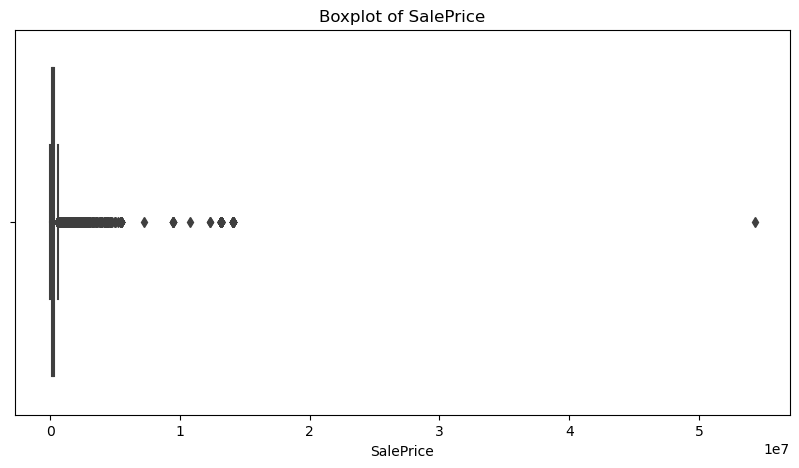

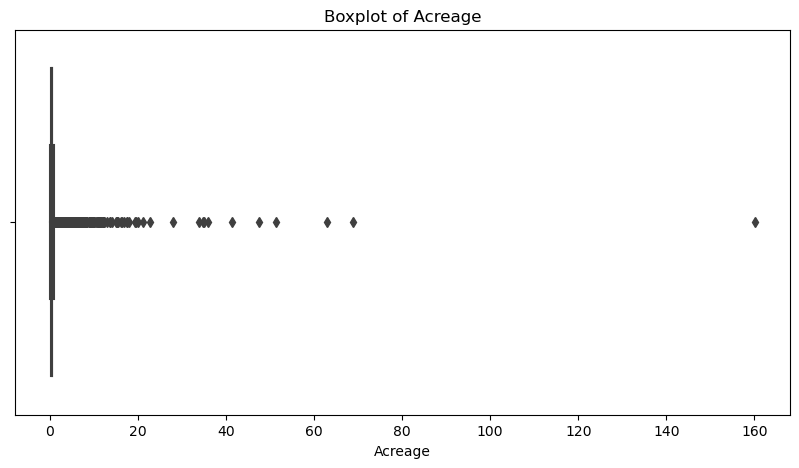

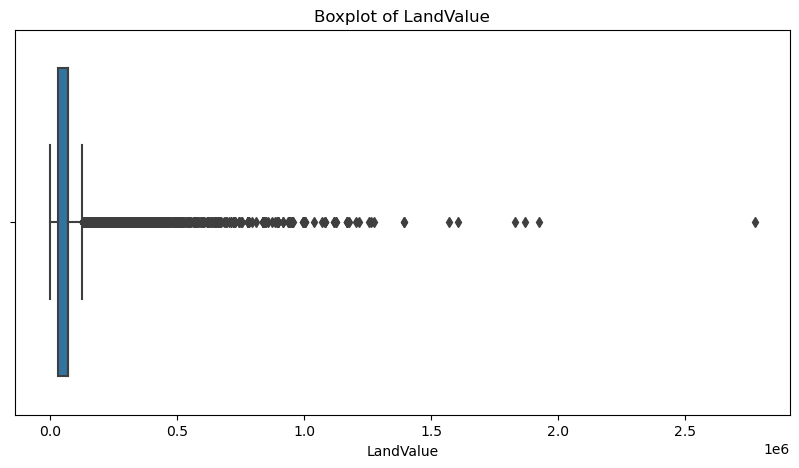

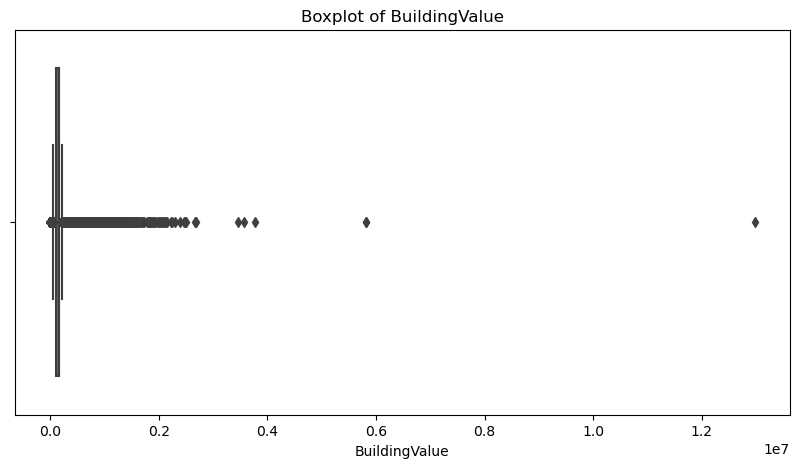

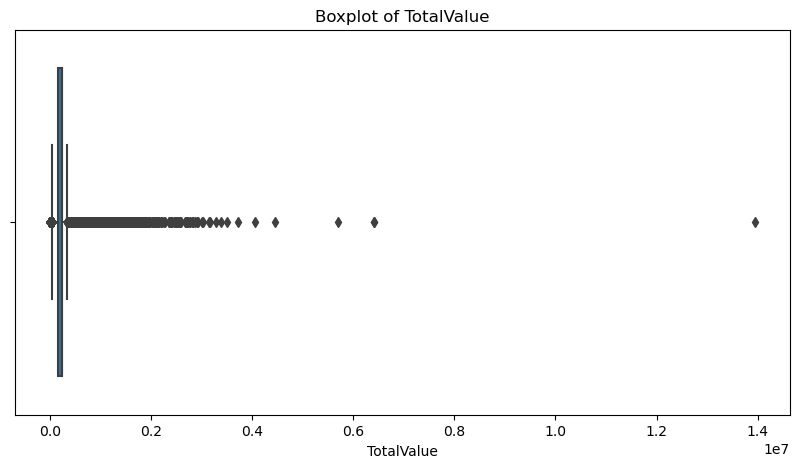

In [25]:
# List of numerical columns which might have outliers to plot
numerical_columns = ['SalePrice', 'Acreage', 'LandValue', 'BuildingValue', 'TotalValue']

# Create boxplots for each numerical column
for column in numerical_columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[column].dropna())  # Drop NaN values for plotting
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.show()

As per the above boxplots, all of the mentioned columns have outliers. However, these outliers cannot be treated as these outliers are circumstancial and not just anaomoly in the dataset. Treating these outliers can lead in loss of important information so we will be leaving them as they are.

We will be addiing another column property age to help understand the price differnces better.

In [26]:
from datetime import datetime
# Calculate the current year
current_year = datetime.now().year

# Create a new column for property age
df['PropertyAge'] = current_year - df['YearBuilt']

# Display the first few rows to verify the changes
print(df[['YearBuilt', 'PropertyAge']].head())

   YearBuilt  PropertyAge
0       1986           38
1       1998           26
2       1987           37
3       1985           39
4       1984           40


Adding a complete bathrrom column to make it less complicated with full and half bath

In [27]:
# Create a new column for total bathrooms
df['TotalBathrooms'] = df['FullBath'] + (df['HalfBath'] * 0.5)

# Display the first few rows to verify the changes
print(df[['FullBath', 'HalfBath', 'TotalBathrooms']].head())

   FullBath  HalfBath  TotalBathrooms
0       3.0       0.0             3.0
1       3.0       2.0             4.0
2       3.0       0.0             3.0
3       3.0       0.0             3.0
4       3.0       0.0             3.0


We will be removing full and half bath columns now.

In [28]:
dropbaths= ['FullBath','HalfBath']
df.drop(columns=dropbaths, inplace=True)
df.head()

,LandUse,PropertyAddress,SaleDate,SalePrice,SoldAsVacant,Acreage,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,City,PropertyAge,TotalBathrooms
0,SINGLE FAMILY,"1808 FOX CHASE DR, GOODLETTSVILLE",2013-04-09,240000.0,No,2.3,50000.0,168200.0,235700.0,1986,3.0,GOODLETTSVILLE,38,3.0
1,SINGLE FAMILY,"1832 FOX CHASE DR, GOODLETTSVILLE",2014-06-10,366000.0,No,3.5,50000.0,264100.0,319000.0,1998,3.0,GOODLETTSVILLE,26,4.0
2,SINGLE FAMILY,"1864 FOX CHASE DR, GOODLETTSVILLE",2016-09-26,435000.0,No,2.9,50000.0,216200.0,298000.0,1987,4.0,GOODLETTSVILLE,37,3.0
3,SINGLE FAMILY,"1853 FOX CHASE DR, GOODLETTSVILLE",2016-01-29,255000.0,No,2.6,50000.0,147300.0,197300.0,1985,3.0,GOODLETTSVILLE,39,3.0
4,SINGLE FAMILY,"1829 FOX CHASE DR, GOODLETTSVILLE",2014-10-10,278000.0,No,2.0,50000.0,152300.0,202300.0,1984,4.0,GOODLETTSVILLE,40,3.0


We will be extracting months and years as well for more unique analysis.

In [29]:
# Convert SaleDate to datetime format
df['SaleDate'] = pd.to_datetime(df['SaleDate'], errors='coerce')

# Extract month and year from SaleDate
df['SaleMonth'] = df['SaleDate'].dt.month
df['SaleYear'] = df['SaleDate'].dt.year

# Display the first few rows to verify the changes
print(df[['SaleDate', 'SaleMonth', 'SaleYear']].head())

    SaleDate  SaleMonth  SaleYear
0 2013-04-09          4      2013
1 2014-06-10          6      2014
2 2016-09-26          9      2016
3 2016-01-29          1      2016
4 2014-10-10         10      2014


In [30]:
# checking the shape now...
df.shape

(55502, 16)

#### Comparison:

Shape before cleaning : (56477, 19)

Shape after cleaning : (55502, 16)

We have cleaned the data and added some columns as well. We haven't lost any much of the important information.

## Did we completed the objective?

**1. _Identifying and Handling Missing Values:_**

**<u>Action Taken:</u>**  Missing values in numerical columns were addressed using KNN imputation, and categorical columns like PropertyAddress and City were filled using the mode.

**<u>Objective Achieved:</u>** Yes, missing values were handled appropriately to maintain data integrity.

**2. _Detecting and Addressing Outliers:_**

**<u>Action Taken:</u>** Outliers were identified using boxplots, and options for handling them (removal or capping) were provided. The decision to handle outliers was discussed, considering the context of real estate data.

**<u>Objective Achieved:</u>** Yes, outliers were detected, and strategies for addressing them were outlined.

**3. _Standardizing Data Formats:_**

**<u>Action Taken:</u>** The SaleDate column was converted to a datetime format for consistency, and PropertyAddress was processed to extract City.

**<u>Objective Achieved:</u>** Yes, data formats were standardized for date and text fields.

**4. _Removing Duplicate Records:_**

**<u>Action Taken:</u>** Duplicate records were identified and removed from the dataset.

**<u>Objective Achieved:</u>** Yes, duplicates were successfully removed to ensure unique entries.

**5. _Conducting Feature Engineering:_**

**<u>Action Taken:</u>** New features were created, including PropertyAge and TotalBathrooms, and additional features like SaleMonth and SaleYear were extracted from SaleDate.

**<u>Objective Achieved:</u>** Yes, feature engineering was conducted to enhance the dataset with additional relevant features.

Last few changes before extracting the cleaned data.

In [31]:
# Round Acreage to 2 decimal points
df['Acreage'] = df['Acreage'].round(2)

# Round LandValue, BuildingValue, TotalValue, and Bedrooms to integers
df['LandValue'] = df['LandValue'].round().astype(int)
df['BuildingValue'] = df['BuildingValue'].round().astype(int)
df['TotalValue'] = df['TotalValue'].round().astype(int)
df['Bedrooms'] = df['Bedrooms'].round().astype(int)

In [32]:
#Convert saleprice to integer
# Fill missing values with the median
median_value = df['SalePrice'].median()
df['SalePrice'].fillna(median_value, inplace=True)

# Convert to integer
df['SalePrice'] = df['SalePrice'].round().astype(int)

In [33]:
# Round TotalBathrooms to 1 decimal point, ensuring it rounds to 0.5 or next whole number
df['TotalBathrooms'] = df['TotalBathrooms'].apply(lambda x: round(x * 2) / 2)

In [34]:
# Convert SaleMonth numbers to actual month names
df['SaleDate'] = pd.to_datetime(df['SaleDate'], errors='coerce')
df['SaleMonth'] = df['SaleDate'].dt.month_name()

In [35]:
# Extracting the csv...
# Save the cleaned DataFrame to a new CSV file
cleaned_file_path = '/users/nik/downloads/Cleaned-Nashville-Housing-Data.csv'
df.to_csv(cleaned_file_path, index=False)

# Confirm the file has been saved
print(f"Cleaned data has been saved to {cleaned_file_path}")

Cleaned data has been saved to /users/nik/downloads/Cleaned-Nashville-Housing-Data.csv
